In [2]:
from scipy.stats import norm, rayleigh, poisson
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print(norm.cdf(0))
print(norm.cdf(1))
print(norm.cdf(2))
print(norm.cdf(5))
print(norm.cdf(-1))

0.5
0.8413447460685429
0.9772498680518208
0.9999997133484281
0.15865525393145707


In [4]:
print(norm.ppf(0.5))
print(norm.ppf(0.8413447460685429))
print(norm.ppf(norm.cdf(2)))
print(norm.ppf(0.9999997133484281))
print(norm.ppf(0.15866))

0.0
1.0
2.0000000000000004
4.999999999970176
-0.9999803859660787


The above two cells are a check on the cdf and ppf functions of norm. We note two things:
1. The functions are inverses of one another - to within the machine error of my computer, norm.ppf(norm.cdf(x)) = x. We know the initial norm.cdf(x) calls give the correct values, because a quick cross-check with any readily available z-table for the normal distribution online gives the same values as our function does.
2. The domain of norm.ppf is a probability - that is, some value in [0, 1], and its codomain is a vector on the reals in units of the standard deviation, which tells us to which point we integrate from negative infinity on the normal distribution to obtain the given probability P - that is, $P(x) = \int_{-\infty}^x N(y) dy$ where we denote the normal distribution's probability density function by $N(x)$. A negative value for this vector x corresponds simply to integrating from negative infinity to the point |x| to the left of the origin.

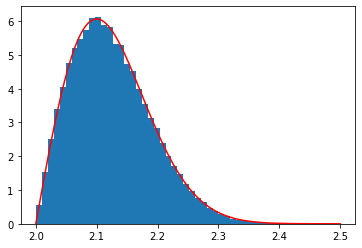

In [4]:
r = rayleigh.rvs(loc = 2, scale = 0.1, size = 10**5)
plt.hist(r, 50, density=True)
x = np.linspace(2, 2.5, 1000)
plt.plot(x, rayleigh.pdf(x, loc = 2, scale = 0.1), 'r')
plt.show()

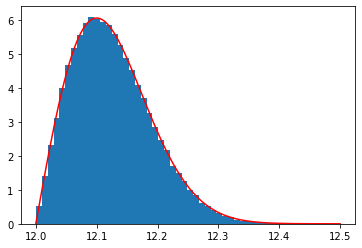

In [6]:
plt.cla()
R = rayleigh.rvs(loc = 12, scale = 0.1, size = 10**5) #note the change in loc!
plt.hist(R, 50, density=True)
x = np.linspace(12, 12.5, 1000)
plt.plot(x, rayleigh.pdf(x, loc = 12, scale = 0.1), 'r')
plt.show()

From the above we deduce two things: first, the distribution matches excellently to the sample of values from the distribution for sufficiently large sample sizes, and two, the 'loc' parameter fixes the location of the distribution - specifically, it fixes the location of the farthest left value on the distribution.

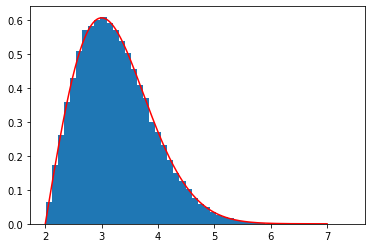

In [7]:
plt.cla()
r = rayleigh.rvs(loc = 2, scale = 1, size = 10**5) #note the change in scale!
plt.hist(r, 50, density=True)
x = np.linspace(2, 7, 1000)
plt.plot(x, rayleigh.pdf(x, loc = 2, scale = 1), 'r')
plt.show()

Above we returned the loc parameter to its original value and changed the 'scale' parameter - this altered the width of the distribution. Before, when scale = 0.1, the peak was at 2.1 for loc = 2, so that peak - loc = scale, and this relation holds here. We deduce that this is the analogue of our standard deviation from the normal distribution, which entirely defined its width. We also note that due to our assumption of normalization, widening the graph necessarily flattens it, so the magnitude of our peak has fallen by a factor of 10, just as scale increased the width by a factor of 10. We deduce the scaling factor (by which the peak height is reduced and the distribution width is increased) is something on the order of $10^{scale}$.

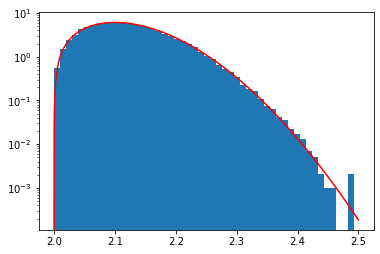

In [5]:
plt.cla()
r = rayleigh.rvs(loc = 2, scale = 0.1, size = 10**5)
plt.hist(r, 50, density=True)
x = np.linspace(2, 2.5, 10000)
plt.plot(x, rayleigh.pdf(x, loc = 2, scale = 0.1), 'r')
plt.yscale('log')
plt.show()

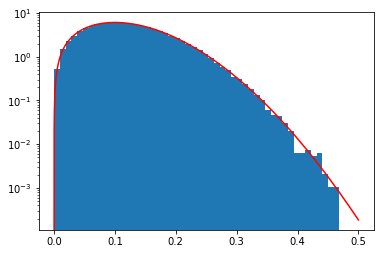

In [8]:
plt.cla()
r = rayleigh.rvs(loc = 0, scale = 0.1, size = 10**5) #note the change in loc!
plt.hist(r, 50, density=True)
x = np.linspace(0, 0.5, 10000)
plt.plot(x, rayleigh.pdf(x, loc = 0, scale = 0.1), 'r')
plt.yscale('log')
plt.show()

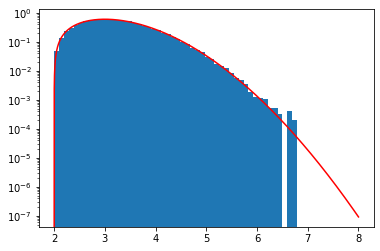

In [10]:
plt.cla()
r = rayleigh.rvs(loc = 2, scale = 1, size = 10**5) #note the change in scale!
plt.hist(r, 50, density=True)
x = np.linspace(2, 8, 10000)
plt.plot(x, rayleigh.pdf(x, loc = 2, scale = 1), 'r')
plt.yscale('log')
plt.show()

As expected the changing of the variables affects the log of the distribution in an identical way, with loc shifting the left edge and scale changing the, well, scale.

Now, suppose we had data which is suspected to be signal free and follow a Rayleigh distribution, with parameters loc = 0, scale = 1, and suppose additonally we have already normalized our data. Then, suppose we take a measurement from this data and return a value of 5. The question we then seek to answer is:
    What is the probability the background gives me a data point that looks as or more signal like than the data point I 
    have? For this probability, what sigma away from the mean would this probability correspond to on a Gaussian 
    distribution?

We convert this to an integral in the following manner: first, we normalize the distribution (already done here by assumption). We then note the probability of a measurement occurring in a certain range is the integral of the distribution over this range. A more "signal-like" measurement here occurs to a measurement greater than our measurement, so the likelihood of the measurement occuring is an integral from our data point (x = 5) to infinity. In other words, if $R(x)$ is the Rayleigh distribution, P(better signal than 5) = $\int^{-\infty}_5 R(x) dx$. We calculate this simply enough: rayleigh.cdf(x) integrates the distribution from negative infinity to x, and since the distribution is normalized, we have that the integral of it over the whole real line is 1, so we get our desired probability is P = $\int_5^{\infty} R(x) dx = 1 - \int_{-\infty}^5 = 1 - $ rayleigh.cdf(5).

In [9]:
print(1 - rayleigh.cdf(5))

3.7266531720536733e-06


We then want the sigma that would correspond to this probability on a Gaussian distribution, which we calculate with the normal norm.ppf(x) - but note norm.ppf is an odd function of x, and norm.cdf satisfies $norm.cdf(x) = - norm.cdf(1-x)$, so we just use the regular norm.cdf(5) value as an input to our ppf to get a positive answer.

In [10]:
print(norm.ppf(rayleigh.cdf(5)))

4.4803146987717914


We then get that the sigma of this result is to a good approximation 4.48. However, immediately the general case suggests itself: the probability as calculated above for some other measurement x will be 1 - rayleigh.cdf(x), assuming x positive, and vanishing otherwise, as the pdf of the Rayleigh distribution is 0 on the negative numbers. We graph this function to see the variance with the measurement at a glance.

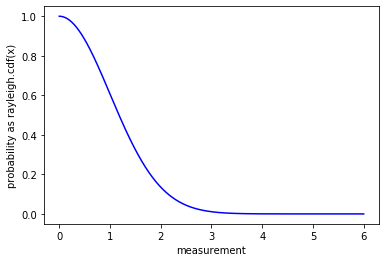

In [11]:
plt.cla()
x = np.linspace(0, 6, 10000)
plt.plot(x, 1 - rayleigh.cdf(x), 'b')
plt.xlabel("measurement")
plt.ylabel("probability as rayleigh.cdf(x)")
plt.show()

We can also find the sigma of this measurement, which is again obviously in the general case norm.ppf(rayleigh.cdf(x)).

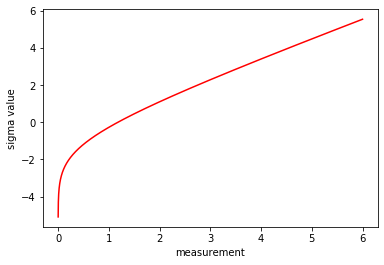

In [17]:
plt.cla()
x = np.linspace(0, 6, 10000)
plt.plot(x, norm.ppf(rayleigh.cdf(x)), 'r')
plt.xlabel("measurement")
plt.ylabel("sigma value")
plt.show()

In short, the farther to the right we go, the lower the probability of getting data which is more signal-like than the background drops off very fast, and the sigma of measurement values is rapidly growing for small measurement values, and approximately linear in the measurement for larger values. That settled, we now look to the Poisson distribution.

The Poisson distribution has one parameter, lambda.

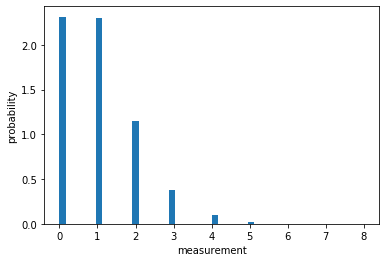

In [3]:
plt.cla()
p = poisson.rvs(1, size = 100000)
plt.hist(p, 50, density = True)
plt.xlabel("measurement")
plt.ylabel("probability")
plt.show()

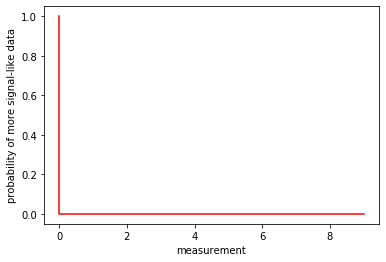

In [14]:
plt.cla()
x = range(10)
plt.step(x, poisson.pmf(x, 0), 'r')
plt.xlabel("measurement")
plt.ylabel("probability mass function")
plt.show()

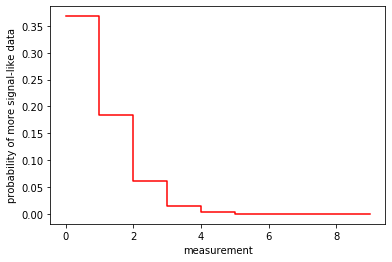

In [13]:
plt.cla()
x = range(10)
plt.step(x, poisson.pmf(x, 1), 'r')
plt.xlabel("measurement")
plt.ylabel("probability mass function")
plt.show()

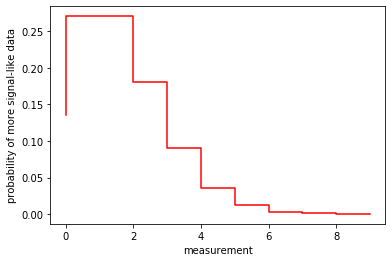

In [15]:
plt.cla()
x = range(10)
plt.step(x, poisson.pmf(x, 2), 'r')
plt.xlabel("measurement")
plt.ylabel("probability mass function")
plt.show()

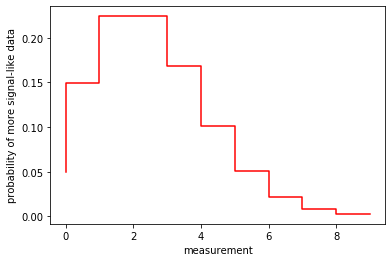

In [17]:
plt.cla()
x = range(10)
plt.step(x, poisson.pmf(x, 3), 'r')
plt.xlabel("measurement")
plt.ylabel("probability mass function")
plt.show()

Increasing lambda "drags" the center of the distribution about; it in effect describes the center of the distribution. This makes sense, considering the real-world Poisson distribution has lambda describe the mean number of successes in low-success-probability identical trials. Increasing the mean would require that we tend to have a higher probability of getting a larger number of successes over many observation periods so as to drag the average up. We can then take a measurement on this distribution, and say it returns value x. We may ask what is the probability that the background gives a data point that is as or more signal-like than x, and we may also ask what sigma on a Gaussian corresponds to this measurement.

The distribution is normalized, so the likelihood of seeing a more signal-like event from this background is the integral of the distribution from the data point up to infinity. We arbitrarily pick a lambda and look at the graph of the integral from x to infinity of the distribution, which by normalization is equivalent to 1 - poisson.cdf(x, lambda), following exactly the same argument as in the continuous case. Check for several lambda:

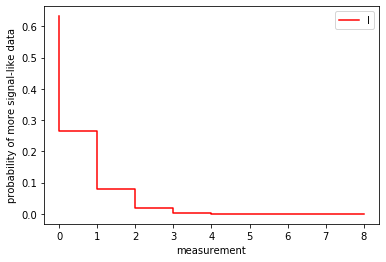

In [27]:
plt.cla()
lam = 1 # our choice of lambda - it will vary
x = range(9)
plt.step(x, 1 - poisson.cdf(x, lam), 'r')
plt.xlabel("measurement")
plt.ylabel("probability of more signal-like data")
plt.show()

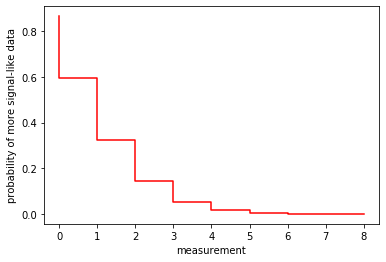

In [28]:
plt.cla()
lam = 2 
x = range(9)
plt.step(x, 1 - poisson.cdf(x, lam), 'r')
plt.xlabel("measurement")
plt.ylabel("probability of more signal-like data")
plt.show()

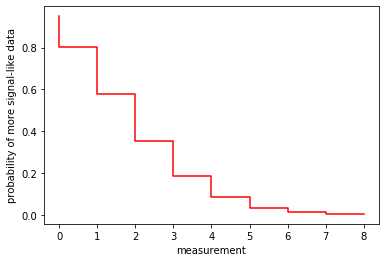

In [29]:
plt.cla()
lam = 3
x = range(9)
plt.step(x, 1 - poisson.cdf(x, lam), 'r')
plt.xlabel("measurement")
plt.ylabel("probability of more signal-like data")
plt.show()

The larger lambda values increase the probability at larger measurements, and slows the die-off of the function probability function. We also want our sigma, and we just feed our probability from above into the norm.ppf() function - but again, this function satisfies norm.ppf(1 - x) = - norm.ppf(x), and we want our sigma to be nonnegative, so we take norm.ppf(poisson.cdf(x, lambda)) to be our sigma. Note we are here ignoring, as we did above, the trivial case of lambda = 0; this reduces to a delta function centered at 0, and is not worth considering. We instead consider only positive lambda.

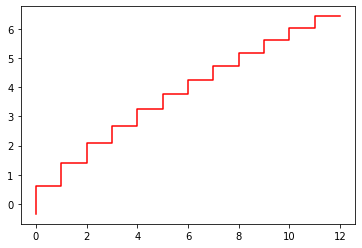

In [31]:
plt.cla()
x = range(13)
lam = 1
plt.step(x, norm.ppf(poisson.cdf(x, lam)), 'r')
plt.xlabel("measurement")
plt.ylabel("sigma value")
plt.show()

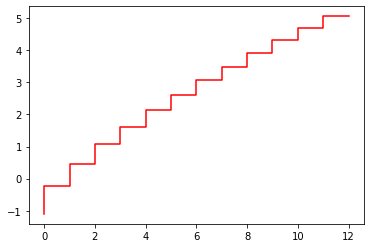

In [32]:
plt.cla()
x = range(13)
lam = 2
plt.step(x, norm.ppf(poisson.cdf(x, lam)), 'r')
plt.xlabel("measurement")
plt.ylabel("sigma value")
plt.show()

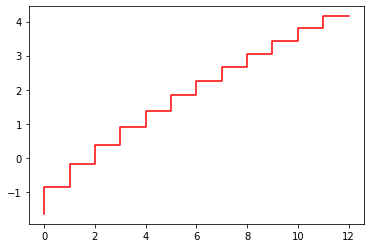

In [33]:
plt.cla()
x = range(13)
lam = 3
plt.step(x, norm.ppf(poisson.cdf(x, lam)), 'r')
plt.xlabel("measurement")
plt.ylabel("sigma value")
plt.show()

The probability of getting more signal-like events than x is a quickly falling function of x, which appears to go like $x^{-1}$. The sigma of measurement x, meanwhile, appears to go roughly linearly in x. Both of these functions are discretized, which is a consequence of the underlying data. Our way of graphing is actually misleading, because it appears that there are intervals on which the probability\sigma function is constant, but it really is not. Instead, we must consider what, exactly, could happen at, say, x = 1.5. We must remind ourselves here that x is a discrete variable, representing some discrete occurence - such as the number of coin flips where the outcome was a heads. There can NEVER be a chain of trials in which we record there were 1.5 flips that resulted in heads, as each trial either gives heads, or it does not. To be blunt, all values which are not nonnegative integers are not in the domain of our defined probability and sigma functions. Even drawing a line above the value x = 1.5 is incorrect, because, strictly speaking, there can be no such outcome to our experiment, assuming it is some discrete distribution (note: I know a coin flip trial will follow the binomial, not the Poisson distribution, but the coin flip is much more familiar; if the reader prefers, replace the counting of coin flips by counting the number of neutrino scattering events per second in  a pound of solid lead). We either get 1 or 2 heads in a flip, nothing in between. It is useful as a visualization device because we are used to seeing functions defined on the entire real line, but still misleading. Formally speaking, we can consider our probability function we described above, $P$, and our function which returns the sigma for a given measurement, $\sigma$, as $P: \mathbb{N} \to [0, 1]$, and $\sigma: \mathbb{N} \to \mathbb{R}$.

The discretization of the distribution does not require our lambda be discrete, as it is in reality the limit of the average over measurements' postions as the number of measurements goes to infinity. There is no reason why an average of integers is an integer, and it is often not - consider the average of 1 and 0. This suggests a general rule for what is allowed to take arbitrary values, and what is not - any quantity that depends upon some aggregate of individual measurements, or, equivalently, some input parameter that determines the shape of the distribution a priori, will be allowed to take on non-integer values, while something that depends upon or is itself a single measurement will be required to take only values in a discretized spectrum, where I use "discretized" to mean a spectrum which has between the majority of points empty space. There is no aggregation in quantities which depend on only a single value input measurement which can "wash out" the discretization of the input, so we expect these values to also be discretized. 

The continuously varying quantity that we have here is the lambda of the distribution, which as noted corresponds to a sort of average of many measurements, and is thus aggregate in the sense discussed above. The discretely varying quantities are the measurements, probabilities of obtaining more signal-like measurements than a given value (as implied by the name, the function depends on only a single measurement value), and the sigma of a given measurement (again, dependent on only one input measurement). Note that the one continuous value is aggregate as I suspsected above, and the discrete values depend on a single measurement value, so at least in this case, it appears as though I am correct in my arguments about the continuous/discrete dichotomy.